In [1]:
# 这次实战会随机生成一个2x+1的数据集，噪声不大于0.4，然后训练得到wx+b中的w和b
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

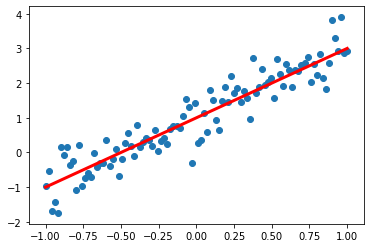

In [2]:
#1. 准备数据
np.random.seed(8)

#随机生成一个2x+1的数据集，噪声不大于0.4
x_data = np.linspace(-1,1,100)
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

# 画出来瞅瞅
plt.scatter(x_data, y_data)
plt.plot(x_data, 2 * x_data + 1, color='red', linewidth=3)

In [12]:
#2. 构建模型
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')
w = tf.Variable(1.0, name='w')
b = tf.Variable(0.0 ,name='b')

# 预测函数
def model(w,x,b):
    return tf.multiply(w,x) + b

# 预测值
pred = model(w,x,b)

# 迭代次数（训练轮数）
train_epochs = 10
# 学习率（步长）
learning_rate = 0.05

# 损失函数（采用L2损失函数即MSE）
loss_function = tf.reduce_mean(tf.square(y - pred))

# 定义优化器（最小化损失优化）
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
print(optimizer)

name: "GradientDescent_2"
op: "NoOp"
input: "^GradientDescent_2/update_w_2/ApplyGradientDescent"
input: "^GradientDescent_2/update_b_2/ApplyGradientDescent"



epoch =  1 step =  10 , loss =  0.0709546
epoch =  1 step =  20 , loss =  0.0024175206
epoch =  1 step =  30 , loss =  0.0144923525
epoch =  1 step =  40 , loss =  0.009112224
epoch =  1 step =  50 , loss =  0.5657753
epoch =  1 step =  60 , loss =  0.7236595
epoch =  1 step =  70 , loss =  0.008254112
epoch =  1 step =  80 , loss =  0.24276114
epoch =  1 step =  90 , loss =  0.053767428
epoch =  1 step =  100 , loss =  0.025361253
epoch =  2 step =  110 , loss =  0.004975071
epoch =  2 step =  120 , loss =  0.01682506
epoch =  2 step =  130 , loss =  0.09286553
epoch =  2 step =  140 , loss =  0.013991623
epoch =  2 step =  150 , loss =  0.2625544
epoch =  2 step =  160 , loss =  0.3626107
epoch =  2 step =  170 , loss =  0.019999955
epoch =  2 step =  180 , loss =  0.08925836
epoch =  2 step =  190 , loss =  0.14312403
epoch =  2 step =  200 , loss =  0.069168255
epoch =  3 step =  210 , loss =  0.024505842
epoch =  3 step =  220 , loss =  0.010032229
epoch =  3 step =  230 , loss = 

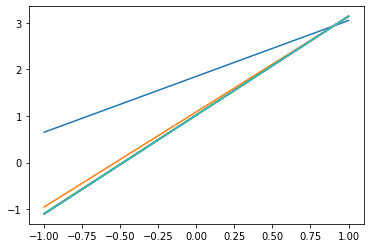

In [4]:
#3. 训练模型
sess = tf.Session();
sess.run(tf.global_variables_initializer())

#这些都是可选的步骤，用于显示loss值变化
step = 0 # 记录步数
loss_list = [] # 保存loss值
display_step = 10 # 显示间距

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x:xs,y:ys})
        loss_list.append(loss)
        step = step + 1;
        if step % display_step == 0 :
            print('epoch = ',epoch + 1,'step = ',step,', loss = ',loss)

    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    plt.plot(x_data, w0temp * x_data + b0temp)

w: 2.1232266
b: 1.0203329


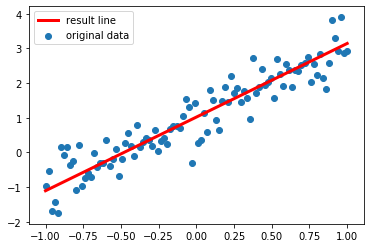

In [5]:
# 3.训练模型
print('w:' , sess.run(w))
print('b:' , sess.run(b))
# 结果可视化
plt.scatter(x_data,y_data,label='original data')
plt.plot(x_data, sess.run(w) * x_data + sess.run(b), label='result line',color='red', linewidth=3)
plt.legend(loc=2)


In [6]:
#4. 进行预测
x_test = 3.21
predict = sess.run(pred, feed_dict = {x:x_test})
target = 2 * x_test + 1
diff = target - predict

print('实际', target, '预测', predict, '差值', diff)

实际 7.42 预测 7.8358903 差值 -0.41589029312133796


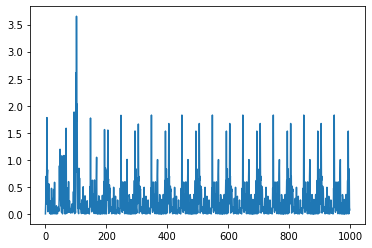

In [7]:
plt.plot(loss_list)

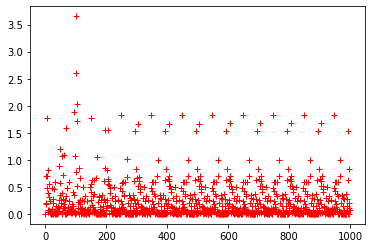

In [8]:
plt.plot(loss_list,'r+')

In [9]:
[x for x in loss_list if x>1]

[1.7805717,
 1.1954406,
 1.07372,
 1.0798312,
 1.583379,
 1.8837076,
 1.0682291,
 2.6112535,
 3.6539502,
 1.7230924,
 2.0296702,
 1.7718941,
 1.0471213,
 1.5590413,
 1.5493801,
 1.8223426,
 1.0072482,
 1.5330641,
 1.660892,
 1.826631,
 1.0039201,
 1.5308827,
 1.6704768,
 1.8269925,
 1.0036392,
 1.5306987,
 1.6712877,
 1.8270231,
 1.0036157,
 1.5306834,
 1.6713551,
 1.827026,
 1.0036134,
 1.5306822,
 1.6713613,
 1.8270264,
 1.0036134,
 1.5306816,
 1.6713625,
 1.8270264,
 1.0036134,
 1.5306816,
 1.6713625,
 1.8270264,
 1.0036134,
 1.5306816]

In [10]:
sess.close()